
# The decomposition example using SVD and SVM

The goal of this example is to demonstrate how Singluar Value Decomposition, an unsupervised method works.

Here we'll take a look at a simple facial recognition example. We are using subset of <b>`Labeled Faces in the Wild`</b> `<http://vis-www.cs.umass.edu/lfw/>`  data that is available with func:`sklearn.datasets.fetch_lfw_people`. 

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

## Visualize the faces to see what we're working with

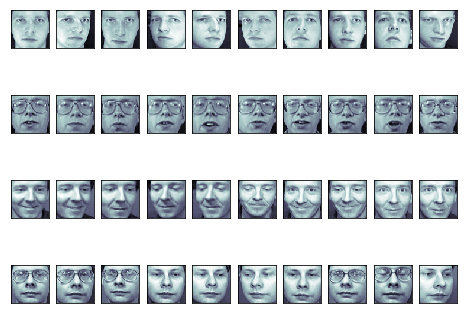

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


## Preprocessing: Singular Value Decomposition


1850 dimensions is a lot for SVM. We can use SVD to reduce these 1850
features to a manageable size, while maintaining most of the information
in the dataset.



In [7]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=150)
svd.fit(X_train)

TruncatedSVD(algorithm='randomized', n_components=150, n_iter=5,
       random_state=None, tol=0.0)

In [9]:
print(svd.components_.shape) # dimensionality reduction

(150, 4096)


Visualize these principal components:



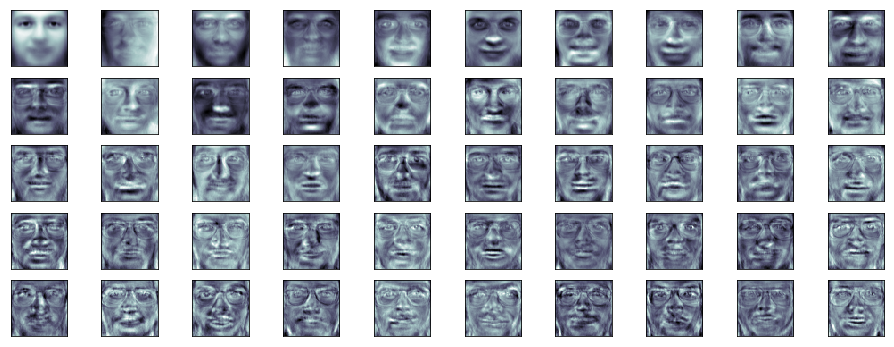

In [10]:
fig = plt.figure(figsize=(16, 6))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(svd.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

## Apply SVD to X

In [13]:
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)
print(X_train_svd.shape)
print(X_test_svd.shape)

(300, 150)
(100, 150)


## Train a machine learning model

We will using Support vector machines for the classification.

In [14]:
from sklearn import svm
# create SVM mdoel
clf = svm.SVC(C=5., gamma=0.001)
# train SVM
clf.fit(X_train_svd, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# predict using SVM
y_pred = clf.predict(X_test_svd)
print(y_pred)

[13 30 34 19 24  6 15 26 12 21  3 13 11 39  1  5 29 14 20 19 22 26 12 39
 17 31 39  1 28 10 22 30 33 22  6  7  9 22 17  8 10 32 15  7 29  5 37 25
 15 23 12 14 29 22 28 31  5  1  2  4  7 27  0 35 19 37 14 39 15 31  0 26
  6  2 10  1 36 30 36 32 33  6  5 10 30 22 12 37 29 32 38 25  5 15 29  3
 13  8 26 36]


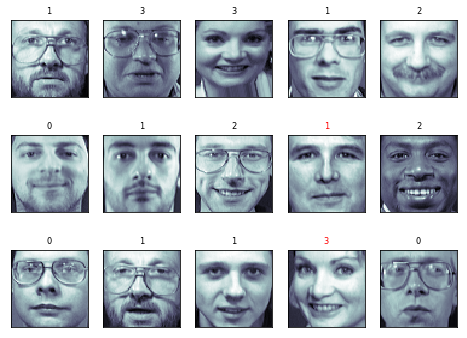

In [16]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_svd[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

In [17]:
# compute the accuracy
from sklearn import metrics
y_pred = clf.predict(X_test_svd)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      0.60      0.75         5
          15       0.60      1.00      0.75         3
          17       1.00      0.33      0.50         6
          19       1.00    

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
